# Activity: Address missing data 

## Introduction

The datasets that data professionals use to solve problems typically contain missing values, which must be dealt with in order to achieve clean, useful data. This is particularly crucial in exploratory data analysis (EDA). In this activity, you will learn how to address missing data. 

You are a financial data consultant, and an investor has tasked your team with identifying new business opportunities. To help them decide which future companies to invest in, you will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." Your client will use this information to learn about profitable businesses in general.

The investor has asked you to provide them with the following data: 
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)

Your dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent. 

## **Step 1: Imports** 

### Import libraries

Import the following relevant Python libraries:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `plotly.express`
* `seaborn`



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset


The dataset is currently in CSV format and in a file named `Unicorn_Companies.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
df = pd.read_csv("Unicorn_Companies.csv")

In [3]:
df_companies = df[:]

In [4]:
count_total = df_companies.size
count_total

10740

## **Step 2: Data exploration** 

Explore the dataset and answer questions that will guide your management of missing values. 

### Display top rows

Display the first 10 rows of the data to understand how the dataset is structured.

In [5]:
df.head(3)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."


In [6]:
df.groupby(['Continent']).size().sort_values(ascending=False).reset_index().rename(columns=({0:'Count'}))

,Continent,Count
0,North America,589
1,Asia,310
2,Europe,143
3,South America,21
4,Oceania,8
5,Africa,3


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the materials about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `head(10)` function from the `pandas` library. 

</details>

### Statistical properties of the dataset

Use methods and attributes of the dataframe to get information and descriptive statistics for the data, including its range, data types, mean values, and shape. 


In [7]:
df.rename(columns=({'Date Joined':'Date', 'Country/Region':'Country', 'Year Founded':'Founded', 'Select Investors':'Investors'}), inplace=True)

In [8]:
df.Date = pd.to_datetime(df.Date, format='mixed')

In [9]:
df.Valuation = df.Valuation.str.strip('$B').astype('float')

In [10]:
df = df.drop(df[df.Funding=='Unknown'].index).reset_index(drop=True)

In [11]:
df.Funding = df.Funding.str.strip('$B').str.strip('M').astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Company    1062 non-null   object        
 1   Valuation  1062 non-null   float64       
 2   Date       1062 non-null   datetime64[ns]
 3   Industry   1062 non-null   object        
 4   City       1046 non-null   object        
 5   Country    1062 non-null   object        
 6   Continent  1062 non-null   object        
 7   Founded    1062 non-null   int64         
 8   Funding    1062 non-null   float64       
 9   Investors  1061 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 83.1+ KB


In [13]:
df.Continent.unique()

array(['Asia', 'North America', 'Europe', 'Oceania', 'South America',
       'Africa'], dtype=object)

In [14]:
print(f'Dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

Dataframe has 1062 rows and 10 columns.


**Question: How many columns contain null values?**

In [15]:
df.isnull().value_counts()

Company  Valuation  Date   Industry  City   Country  Continent  Founded  Funding  Investors
False    False      False  False     False  False    False      False    False    False        1045
                                     True   False    False      False    False    False          16
                                     False  False    False      False    False    True            1
Name: count, dtype: int64

In [16]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.
df.describe()

,Valuation,Date,Founded,Funding
count,1062.000000,1062,1062.000000,1062.000000
mean,3.478343,2020-05-22 22:18:18.305084672,2012.917137,338.091337
min,1.000000,2011-04-02 00:00:00,1919.000000,0.000000
25%,1.000000,2019-05-21 12:00:00,2011.000000,166.000000
50%,2.000000,2021-03-29 00:00:00,2014.000000,300.000000
75%,3.000000,2021-09-21 00:00:00,2016.000000,491.500000
max,180.000000,2022-04-05 00:00:00,2021.000000,999.000000
std,8.591965,NaN,5.676539,237.333149


**Question: In what year was the oldest company founded?**

[Write your response here. Double-click (or enter) to edit.]

### Data Preprocessing

In order to answer the investor's questions, some data preprocessing steps are required. The first step is to add a new column to the dataframe containing just the year each company became a unicorn company. Call this new column `Year Joined`. 

In [17]:
df.head(1)

,Company,Valuation,Date,Industry,City,Country,Continent,Founded,Funding,Investors
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."


In [18]:
try:
    df.insert(3, 'Year', df.Date.dt.year)
except:
    print('Year already exists.')

In [19]:
try:
    df.insert(4, 'Month', df.Date.dt.month)
except:
    print('Month already exists.')

In [20]:
try:
    df.insert(5, 'Day', df.Date.dt.day)
except:
    print('Day already exists.')

In [21]:
df.head(1)

,Company,Valuation,Date,Year,Month,Day,Industry,City,Country,Continent,Founded,Funding,Investors
0,Bytedance,180.0,2017-04-07,2017,4,7,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."


Now, use this function to create a new column called `valuation_num` that represents the `Valuation` column as an integer value. To do this, use the series method [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) to apply the `str_to_num()` function to the `Valuation` column.

`apply()` is a method that can be used on a `DataFrame` or `Series` object. In this case, you're using it on the `Valuation` series. The method accepts a function as an argument and applies that function to each value in the series.

```
Example:

 [IN]: def square(x):
           return x ** 2

       my_series = pd.Series([0, 1, 2, 3])
       my_series

[OUT]: 0    0
       1    1
       2    2
       3    3
       dtype: int64

 [IN]: my_series = my_series.apply(square)
       my_series

[OUT]: 0    0
       1    1
       2    4
       3    9
       dtype: int64
```

Notice that the function passed as an argument to the `apply()` method does not have parentheses. It's just the function name.

In [22]:
def to_billions(num):
    return num*10**6

In [23]:
df.Valuation.apply(to_billions).head(2)

0    180000000.0
1    100000000.0
Name: Valuation, dtype: float64

In [24]:
df.Valuation.apply(lambda n:n*10**6).tail(2)

1060    1000000.0
1061    1000000.0
Name: Valuation, dtype: float64

### Find missing values

The unicorn companies dataset is fairly clean, with few missing values. 

In [25]:
# Find the number of missing values in each column in this dataset.
df.isna().sum()

Company       0
Valuation     0
Date          0
Year          0
Month         0
Day           0
Industry      0
City         16
Country       0
Continent     0
Founded       0
Funding       0
Investors     1
dtype: int64

In [26]:
df[df.Investors.isna()]

,Company,Valuation,Date,Year,Month,Day,Industry,City,Country,Continent,Founded,Funding,Investors
626,LinkSure Network,1.0,2015-01-01,2015,1,1,Mobile & telecommunications,Shanghai,China,Asia,2013,52.0,NaN


In [27]:
df['Investors'] = df['Investors'].fillna(value='Unknown') 

In [28]:
df[df.City.isna()].head(3)

,Company,Valuation,Date,Year,Month,Day,Industry,City,Country,Continent,Founded,Funding,Investors
12,FTX,32.0,2021-07-20,2021,7,20,Fintech,NaN,Bahamas,North America,2018,2.0,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,4.0,2020-05-26,2020,5,26,Mobile & telecommunications,NaN,Singapore,Asia,2015,263.0,Kuang-Chi
241,Moglix,3.0,2021-05-17,2021,5,17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,471.0,"Jungle Ventures, Accel, Venture Highway"


In [29]:
df['City'] = df['City'].fillna(value=df.Country) 

In [30]:
df[df.isna().any(axis=1)]

,Company,Valuation,Date,Year,Month,Day,Industry,City,Country,Continent,Founded,Funding,Investors


In [31]:
df.isna().sum()

Company      0
Valuation    0
Date         0
Year         0
Month        0
Day          0
Industry     0
City         0
Country      0
Continent    0
Founded      0
Funding      0
Investors    0
dtype: int64

## Step 3: Model building MISSING VALUES

Think of the model you are building as the completed dataset, which you will then use to inform the questions the investor has asked of you.  

### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and imputing other values in their place. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

Here, you will try both. 

To compare the the effect of different actions, first store the original number of values in a variable. Create a variable called `count_total` that is an integer representing the total number of values in `df_companies`. For example, if the dataframe had 5 rows and 2 columns, then this number would be 10.

In [32]:
# Store the total number of values in a variable called `count_total`
count_total = df_companies.size
df_companies_2 = df_companies[:]
count_total

10740

Now, remove all rows containing missing values and store the total number of remaining values in a variable called `count_dropna_rows`.

In [33]:
df_companies.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [34]:
# Drop the rows containing missing values, determine number of remaining values 
df_companies = df_companies.drop(df[df.isna()].index).reset_index(drop=True)

In [35]:
df_companies.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country/Region      0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

<details>
  <summary><h4><strong>Hint</strong></h4></summary>

  Use the `dropna()` dataframe method to drop rows with missing values.

</details>

Now, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.

In [36]:
# Drop the columns containing missing values, determine number of remaining values
try:
    df_companies.drop(columns=['City','Select Investors'], axis=1, inplace=True)
except:
    print('City and Investors may already be dropped.')

In [39]:
df_companies.isna().sum()

Company           0
Valuation         0
Date Joined       0
Industry          0
Country/Region    0
Continent         0
Year Founded      0
Funding           0
dtype: int64

### From the Exemplar?

In [33]:
df_companies_2.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [35]:
df_companies_2.size

10740

#### Drop Rows

In [34]:
count_dropna_rows = df_companies_2.dropna().size
count_dropna_rows

10570

### Drop Columns

In [36]:
count_dropna_columns = df_companies.dropna(axis=1).size
count_dropna_columns

8592

In [37]:
row_percent = ((count_total - count_dropna_rows) / count_total) * 100
print(f'Percentage removed, rows: {row_percent:.3f}')

col_percent = ((count_total - count_dropna_columns) / count_total) * 100
print(f'Percentage removed, columns: {col_percent:.3f}')

Percentage removed, rows: 1.583
Percentage removed, columns: 20.000


**Question: Which method was most effective? Why?**


They both suck.

Now, practice the second method: imputation. Perform the following steps:

1. Use the [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) dataframe method to fill each missing value with the next non-NaN value in its column. Assign the results to a new dataframe called `df_companies_backfill`.

```
Example:

df =     
        A    B    C
    0   5    a    NaN
    1   10   NaN  False
    2   NaN  c    True

 [IN]: df.fillna(method='backfill')
 
[OUT]: 
        A    B    C
    0   5    a    False
    1   10   c    False
    2   NaN  c    True

```

Notice that if there is a `NaN` value in the last row, it will not backfill because there is no subsequent value in the column to refer to. 

2. Show the rows that previously had missing values.

In [38]:
# 1. Fill missing values using the 'fillna()' method, back-filling
df_companies_backfill = df_companies.fillna(method='backfill')

# 2. Show the rows that previously had missing values
df_companies_backfill.iloc[df_missing_rows.index, :]

C:\Users\clse5199\AppData\Local\Temp\ipykernel_13712\1193077762.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_companies_backfill = df_companies.fillna(method='backfill')


NameError: name 'df_missing_rows' is not defined

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

To backfill missing values, refer to the example provided.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

To show the rows that previously had missing values, you'll need the indices of the rows that had missing values.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

* You already have a dataframe of rows with missing values. It's stored in a variable called `df_missing_rows`.  
* To access its index, call `df_missing_rows.index`. This will give you the row numbers of rows with missing values.  
* Use these index numbers in an iloc[] selection statement on the `df_companies_backfill` dataframe to extract those row numbers.

</details>

**Question: Do the values that were used to fill in for the missing values make sense?**


[Write your response here. Double-click (or enter) to edit.]

Another option is to fill the values with a certain value, such as 'Unknown'. However, doing so doesn’t add any value to the dataset and could make finding the missing values difficult in the future. Reviewing the missing values in this dataset determines that it is fine to leave the values as they are. This also avoids adding bias to the dataset.

## Step 4: Results and evaluation

Now that you've addressed your missing values, provide your investor with their requested data points.

### Companies in the `Hardware` Industry

Your investor is interested in identifying unicorn companies in the `Hardware` industry in the following cities: `Beijing`, `San Francisco`, and `London`. They are also interested in companies in the `Artificial intelligence` industry in `London`. 

Write a selection statement that extracts the rows that meet these criteria. This task requires complex conditional logic. Break the process into the following parts.

1. Create a mask to apply to the `df_companies` dataframe. The following logic is a pseudo-code representation of how this mask could be structured.

```
((Industry==Hardware) and (City==Beijing, San Francisco, or London)) 
OR  
((Industry==Artificial intelligence) and (City==London))
```

You're familiar with how to create Boolean masks based on conditional logic in pandas. However, you might not know how to write a conditional statement that selects rows that have _any one of several possible values_ in a given column. In this case, this is the `(City==Beijing, San Francisco, or London)` part of the expression.

For this type of construction, use the [`isin()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) `Series` method. This method is applied to a pandas series and, for each value in the series, checks whether it is a member of whatever is passed as its argument.

```
Example:

 [IN]: my_series = pd.Series([0, 1, 2, 3])
       my_series
       
[OUT]: 0    0
       1    1
       2    2
       3    3
       dtype: int64
       
 [IN]: my_series.isin([1, 2])
       
[OUT]: 0    False
       1     True
       2     True
       3    False
       dtype: bool
       
```

2. Apply the mask to the `df_companies` dataframe and assign the result to a new variable called `df_invest`.

In [37]:
df[((df.Industry=='Hardware')                & ((df.City=='San Francisco') | 
                                                (df.City=='Beijing') | 
                                                (df.City=='London'))
  | (df.Industry=='Artificial intelligence') &  (df.City=='London'))]

,Company,Valuation,Date,Year,Month,Day,Industry,City,Country,Continent,Founded,Funding,Investors
36,Bitmain,12.0,2018-07-06,2018,7,6,Hardware,Beijing,China,Asia,2015,765.0,"Coatue Management, Sequoia Capital China, IDG ..."
43,Global Switch,11.0,2016-12-22,2016,12,22,Hardware,London,United Kingdom,Europe,1998,5.0,"Aviation Industry Corporation of China, Essenc..."
147,Chipone,5.0,2021-12-16,2021,12,16,Hardware,Beijing,China,Asia,2008,1.0,"China Grand Prosperity Investment, Silk Road H..."
838,Density,1.0,2021-11-10,2021,11,10,Hardware,San Francisco,United States,North America,2014,217.0,"Founders Fund, Upfront Ventures, 01 Advisors"
865,BenevolentAI,1.0,2015-06-02,2015,6,2,Artificial intelligence,London,United Kingdom,Europe,2013,292.0,Woodford Investment Management
914,Geek+,1.0,2018-11-21,2018,11,21,Hardware,Beijing,China,Asia,2015,439.0,"Volcanics Ventures, Vertex Ventures China, War..."
1028,TERMINUS Technology,1.0,2018-10-25,2018,10,25,Hardware,Beijing,China,Asia,2015,623.0,"China Everbright Limited, IDG Capital, iFLYTEK"
1034,Tractable,1.0,2021-06-16,2021,6,16,Artificial intelligence,London,United Kingdom,Europe,2014,120.0,"Insight Partners, Ignition Partners, Georgian ..."


In [38]:
df_invest = df[((df.Industry=='Hardware')                & ((df.City=='San Francisco') | 
                                                            (df.City=='Beijing') | 
                                                            (df.City=='London'))
              | (df.Industry=='Artificial intelligence') &  (df.City=='London'))]

In [39]:
print(f'df_invest has {df_invest.shape[0]} instance(s).')

df_invest has 8 instance(s).


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  * Remember that pandas uses `&` for "and", `|` for "or", and `~` for "not". 
  * Remember that each condition needs to be in its own set of parentheses. Refer to the above pseudo-code for an example.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  * Use `(Series.isin(list_of_cities))` to represent the logic: (City==Beijing, San Francisco, or London)`.
  * There are two sets of conditional pairs: ((A) and (B)) or ((C) and (D)). Make sure the parentheses reflect this logic.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Consider using the following code:

    ```
    cities = ['Beijing', 'San Francisco', 'London']
    mask = (
        (df_companies['Industry']=='Hardware') & (df_companies['City'].isin(cities))
    ) | (
        (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London')
    )
    df_invest = df_companies[mask]
    ```

</details>

**Question: How many companies meet the criteria given by the investor?**


[Write your response here. Double-click (or enter) to edit.]

### List of countries by sum of valuation

For each country, sum the valuations of all companies in that country, then sort the results in descending order by summed valuation. Assign the results to a variable called `national_valuations`.

In [40]:
df.head(2)

,Company,Valuation,Date,Year,Month,Day,Industry,City,Country,Continent,Founded,Funding,Investors
0,Bytedance,180.0,2017-04-07,2017,4,7,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2012-12-01,2012,12,1,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."


In [43]:
# Group the data by`Country/Region`
national_valuations = df.groupby(['Country']).agg({'Valuation':'sum'}).sort_values(by='Valuation', ascending=False).reset_index()

# Print the top 15 values of the DataFrame.
national_valuations[:5]

,Country,Valuation
0,United States,1924.0
1,China,693.0
2,India,196.0
3,United Kingdom,195.0
4,Germany,72.0


<details>
  <summary><h4><strong>Hint</strong></h4></summary>

  Use a `groupby()` statement to group by `Country/Region`, then isolate the `valuation_num` column, sum it, and use the `sort_values()` method to sort the results.

</details>

**Question: Which countries have the highest sum of valuation?**

[Write your response here. Double-click (or enter) to edit.]

### Filter out top 4 outlying countries

Use this grouped and summed data to plot a barplot. However, to meet the needs of your stakeholder, you must first remove the United States, China, India, and the United Kingdom. Remove these countries from `national_valuations` and reassign the results to a variable called `national_valuations_no_big4`.

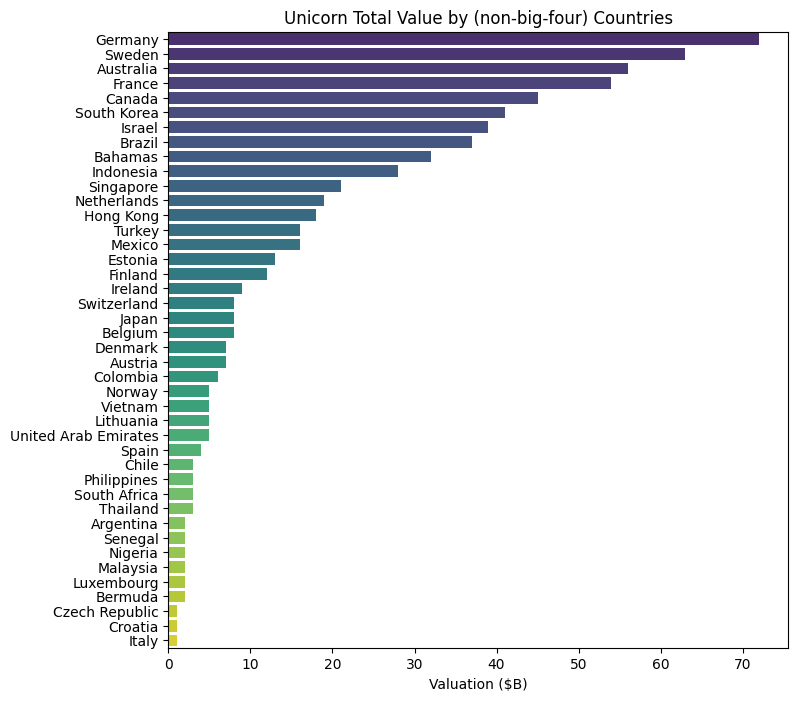

In [42]:
plt.rcParams["figure.figsize"] = (8,8)
sns.barplot(y=national_valuations.Country[4:], x=national_valuations.Valuation[4:],
            palette="viridis", hue=national_valuations['Country'], legend=False)
plt.title('Unicorn Total Value by (non-big-four) Countries')
plt.xlabel("Valuation ($B)")
plt.ylabel(None)
plt.show()

<details>
  <summary><h4><strong>Hint</strong></h4></summary>

There are a number of ways to accomplish this task. One of the easiest ways is to use a simple iloc[] selection statement to select row indices 4&ndash;end and all columns of `national_valuations`.
</details>

### BONUS CONTENT: Alternative approach (optional)

You can also use `isin()` to create a Boolean mask to filter out specific values of the `Country/Region` column. In this case, this process is longer and more complicated than simply using the iloc[] statement. However, there will be situations where this is the most direct approach. 
    
How could you use `isin()` and your knowledge of pandas conditional operators and Boolean masks to accomplish the same task?


In [43]:
df[~df.Country.isin(['United States', 'India', 'China', 'United Kingdom'])].head(3)

,Company,Valuation,Date,Year,Month,Day,Industry,City,Country,Continent,Founded,Funding,Investors
4,Klarna,46.0,2011-12-12,2011,12,12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,40.0,2018-01-08,2018,1,8,Internet software & services,Surry Hills,Australia,Oceania,2012,572.0,"Sequoia Capital China, Blackbird Ventures, Mat..."
12,FTX,32.0,2021-07-20,2021,7,20,Fintech,Bahamas,Bahamas,North America,2018,2.0,"Sequoia Capital, Thoma Bravo, Softbank"


<details>
  <summary><h4><strong>Answer</strong></h4></summary>

In this case, there are 46 total countries and you want to keep countries 5&ndash;46 and filter out countries 1&ndash;4. To use `isin()` would require you to list out 42 countries: 
    
```
mask = national_valuations['Country/Region'].isin(['country_5', 'country_6', ... 'country_46'])
```

This is very impractical. However, you can invert the statement to simplify the job. The above impractical statement becomes:

```
mask = ~national_valuations['Country/Region'].isin(['country_1', 'country_2', 'country_3', 'country_4'])
```

Notice the `~` that precedes the whole statement. This transforms the meaning from "country is in this list" to "country is NOT in this list."
    
Then, simply apply the mask to `national_valuations` and assign the result back to `national_valuations_no_big4`.
</details>

### Create barplot for top 20 non-big-4 countries

Now, the data is ready to reveal the top 20 non-big-4 countries with the highest total company valuations. Use seaborn's [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function to create a plot showing national valuation on one axis and country on the other.

Already did this

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Select the top 20 rows in `national_valuations_no_big4`.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

* Select the top 20 rows in `df_companies_sum_outliers_removed` by using the `head(20)` method.
* Specify `Country/Region` for the `x` parameter of the function and `valuation_num` for the `y` parameter of the function (or vice versa).

</details>

### Plot maps

Your investor has also asked for a global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a.k.a. "big-four countries").

You have learned about using [`scatter_geo()`](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo) from the `plotly.express` library to create plot data on a map. Create a `scatter_geo()` plot that depicts the total valuations of each non-big-four country on a world map, where each valuation is shown as a circle on the map, and the size of the circle is proportional to that country's summed valuation.

In [40]:
import plotly.express as px

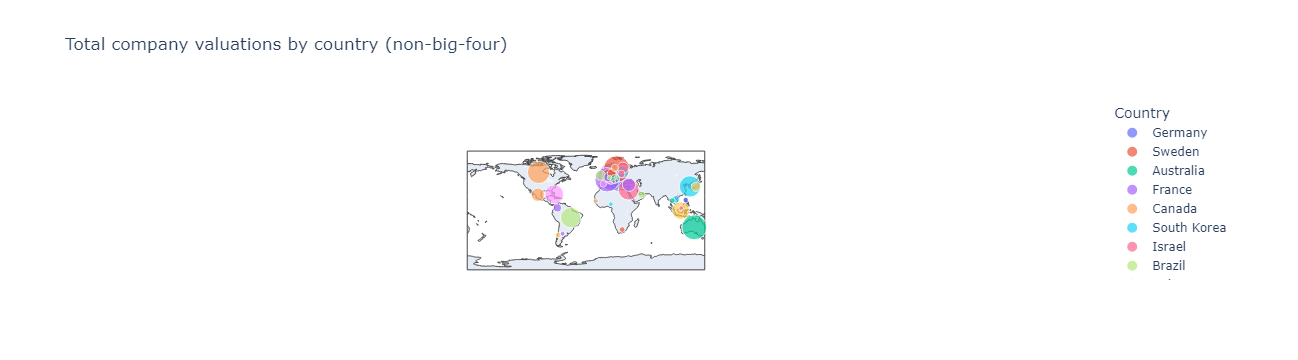

In [55]:
# Plot the sum of valuations per country.
px.scatter_geo(national_valuations[4:], 
               locations='Country', 
               size='Valuation', 
               locationmode='country names', 
               color='Country',
               title='Total company valuations by country (non-big-four)')

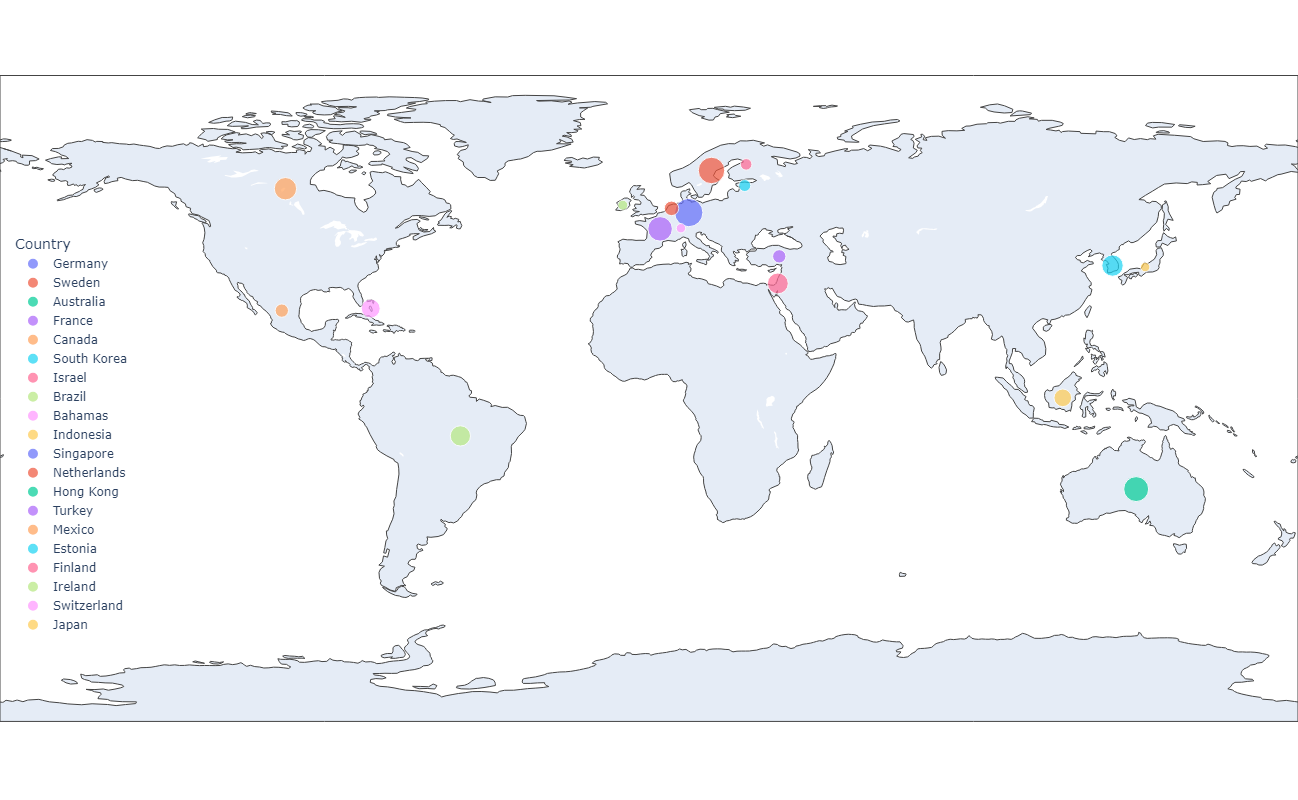

In [104]:
fig = px.scatter_geo(  national_valuations[4:24], 
                       locations='Country', 
                       size='Valuation', 
                       locationmode='country names', 
                       color='Country',
                       title='Valuations by Country (non-big-four)')

fig.update_layout(autosize=True, width=1200, height=800, #showlegend=False,
                  title_text='', title_x=0.5, title_y=0.0,
                  legend=dict(x=0.01, y=0.2, 
                             # xanchor="right",  yanchor="bottom"
                             ),
                  margin=dict(l=0, r=0, t=0, b=0),
                 )

fig.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `national_valuations_no_big4` dataframe that you already created.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

To plot the data:
* Use `national_valuations_no_big4` as the `data_frame` argument of the `scatter_geo()` function.
* Use `'Country/Region'` as the `locations` argument.
* Use `'country names'` as the `locationmode` argument.
* Use `'Country/Region'` as the `color` argument.

Don't forget to include a title!
</details>

**Question: How is the valuation sum per country visualized in the plot?**


[Write your response here. Double-click (or enter) to edit.]

**Question: Does any region stand out as having a lot of activity?**


[Write your response here. Double-click (or enter) to edit.]

## Conclusion

**What are some key takeaways that you learned during this lab?**

[Write your response here. Double-click (or enter) to edit.]

**How would you present your findings from this lab to others? Consider the information you would provide (and what you would omit), how you would share the various data insights, and how data visualizations could help your presentation.**

[Write your response here. Double-click (or enter) to edit.]




**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.